<a href="https://colab.research.google.com/github/drau003/Building-a-regression-model-using-Keras/blob/master/DivFood_21_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Datatable with Averages setup for Python.csv to Datatable with Averages setup for Python.csv


In [23]:
import pandas as pd

import io

df = pd.read_csv(io.BytesIO(data_to_load['Datatable with Averages setup for Python.csv']))

In [24]:
print('The shape of our data is:', df.shape)

The shape of our data is: (857, 124)


In [25]:
# Descriptive statistics for each column
df.describe()

,Date,Time,Ambient T,Time since last Cleaning,Yield Strenght,UTS,Elongation,Hardness,Tin,Oil,Tin2,Oil 2,C,SI,Mn,P,S,Total Spoils,Coolant Concentration,Coolant Temperature,Pulse 204,Pulse 205,Tramp Oil,Main Air Pressure Cupper,Draw Ram Pressure Cupper,Blank RAM Pressure Cupper,Draw Pads Pressure Cupper,Feedroll Pressure Cupper,Clutch Brake Pressure Cupper,Pocket Pressure Cupper,Cupper Speed,Lube Pulse,Sump Temperature,Tank Temperature,Cupper Stop hours,Cupper stops,Main Vacuum Bodymaker,Main Air Pressure Bodymaker,Cam Spindle Pressure Bodymaker,Cam Force Pressure Bodymaker,...,WasherOven T Zone 5,Curing Oven Temperature Zone 1,Curing Oven Temperature Zone 2,Curing Oven Temperature Zone 3,Curing Oven Temperature Zone 4,Washer Speed,Washer Stop Hours,Washer Stops,Washer Oven Speed,Washer Oven Stop Hours,Washer Oven Stops,Washer Coat Speed,Washer Coat Stop Hours,Washer Coat Stops,Flanger Speed,Flange Width Flanger,FlangerFlangeWidthDev,Flange Width Range after Flanger,Can Height Flanger,FlangerCanHeightDev,Can Height Range after Flanger,Flanger Stop Hours,Flanger Stops,Temperature of Beader Tooling,Flange Witdh Beader,BeaderFlangeWidthDev,Flange Witdh Range Beader,FFCH Beader,FFCHDev,FFCH Range Beader,Average Bead Depth,Bead DepthDev,Average Bead Depth Range,Panelling Resistance Beader,PanellingDev,Axial Load Beader,AxialLoadDev,Beader Speed,Beader Stop Hours,Beader Stops
count,857.000000,857.000000,857.000000,857.000000,386.000000,386.000000,386.000000,622.000000,622.000000,425.000000,622.000000,425.000000,754.000000,754.000000,754.000000,754.000000,754.000000,808.000000,685.000000,857.000000,685.000000,685.000000,815.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,857.000000,808.000000,857.000000,857.000000,857.000000,808.000000,808.000000,857.000000,857.000000,857.000000,857.000000,...,264.000000,857.000000,857.000000,857.000000,857.000000,808.000000,808.000000,808.000000,808.000000,808.00000,808.000000,808.000000,808.000000,808.000000,808.00000,857.000000,857.000000,857.000000,857.000000,857.000000,856.000000,808.000000,808.000000,752.000000,857.000000,857.000000,856.000000,857.000000,857.000000,857.000000,856.000000,857.000000,857.000000,824.000000,857.000000,825.000000,857.000000,808.000000,808.000000,808.000000
mean,44310.950992,9.960327,18.997666,2.340723,323.683938,387.738342,29.259067,56.144695,2.240579,4.258118,3.406624,3.643765,3.524801,1.624934,23.675066,1.187135,0.556764,2.315842,5.289927,33.408751,8.403650,19.195620,637.664540,530.746791,264.305718,415.647608,496.931155,285.052509,517.117853,235.133022,969.535891,101.474912,42.296966,40.172929,3.151856,84.518564,85.899650,37.845134,435.425904,150.711785,...,219.560606,100.141190,210.395566,210.133022,210.098016,823.101485,1.294059,20.419554,800.962871,0.66745,22.081683,792.542079,0.366584,22.391089,1024.27599,2.534852,-0.002187,0.073309,107.755775,0.007884,0.067065,4.220916,327.882426,57.252660,2.530806,-0.009194,0.063228,106.591566,0.021776,0.158732,0.580305,0.021833,0.162754,196.441664,11.082767,201.702693,-5.828796,1029.054455,4.501485,441.230198
std,13.440938,1.940304,5.252725,1.154283,43.368594,8.409113,5.736666,1.063959,0.085888,0.419665,0.122856,0.419135,0.808837,0.656818,1.225596,0.285844,0.491131,1.801410,6.827246,0.445885,0.997541,5.177519,210.298854,25.748651,23.040291,8.078584,36.879270,23.901634,19.823435,39.704617,23.037305,4.309535,0.754761,0.946965,1.698194,20.446616,2.421518,143.539531,118.420631,43.318342,...,1.253179,0.674914,1.609298,1.620847,1.232241,34.801538,1.321367,9.725907,43.695960,0.73990,10.771630,53.763014,0.260867,11.555073,29.48533,0.037390,0.094859,0.021380,5.470617,0.072914,0.043124,1.719203,67.467830,1.226643,0.044256,0.044256,0.025149,5.481734,0.089394,0.065589,0.031166,0.039922,0.023118,24.755920,47.367519,7.173917,38.905628,11.443065,1.548016,124.504506
min,44292.000000,7.000000,10.000000,0.000000,281.000000,381.000000,21.000000,54.000000,2.120000,3.800000,3.130000,2.900000,1.700000,1.000000,21.800000,1.

In [26]:
#delete columns
df = df.drop(['Panelling Resistance Beader', 'PanellingDev', 'Axial Load Beader', 'AxialLoadDev', 'FFCH Beader'], axis=1)
print('\n\nDataFrame after deleting columns not directly affecting FFCH')
print(df)



DataFrame after deleting columns not directly affecting FFCH
      Date  Time  Ambient T  ...  Beader Speed Beader Stop Hours  Beader Stops
0    44292    11         22  ...         986.0               7.2         733.0
1    44292    11         22  ...         986.0               7.2         733.0
2    44292    11         22  ...         986.0               7.2         733.0
3    44292    11         22  ...         986.0               7.2         733.0
4    44292    11         22  ...         986.0               7.2         733.0
..     ...   ...        ...  ...           ...               ...           ...
852  44336     8         15  ...           NaN               NaN           NaN
853  44336     8         15  ...           NaN               NaN           NaN
854  44336     8         15  ...           NaN               NaN           NaN
855  44336     8         15  ...           NaN               NaN           NaN
856  44336     8         15  ...           NaN               NaN    

In [27]:
#replace all NaN with the mean of that column
df.fillna(df.mean(), inplace=True)

In [28]:
df.head()

,Date,Time,Ambient T,Time since last Cleaning,Supplier,Yield Strenght,UTS,Elongation,Hardness,Tin,Oil,Tin2,Oil 2,C,SI,Mn,P,S,Can,Total Spoils,Coolant Concentration,Coolant Temperature,Pulse 204,Pulse 205,Tramp Oil,Cupper,Main Air Pressure Cupper,Draw Ram Pressure Cupper,Blank RAM Pressure Cupper,Draw Pads Pressure Cupper,Feedroll Pressure Cupper,Clutch Brake Pressure Cupper,Pocket Pressure Cupper,Cupper Speed,Lube Pulse,Sump Temperature,Tank Temperature,Cupper Stop hours,Cupper stops,Bodymaker,...,WasherOven T Zone 2,WasherOven T Zone 3,WasherOven T Zone 4,WasherOven T Zone 5,Curing Oven Temperature Zone 1,Curing Oven Temperature Zone 2,Curing Oven Temperature Zone 3,Curing Oven Temperature Zone 4,Washer Speed,Washer Stop Hours,Washer Stops,Washer Oven Speed,Washer Oven Stop Hours,Washer Oven Stops,Washer Coat Speed,Washer Coat Stop Hours,Washer Coat Stops,Flanger Number,Flanger Speed,Flange Width Flanger,FlangerFlangeWidthDev,Flange Width Range after Flanger,Can Height Flanger,FlangerCanHeightDev,Can Height Range after Flanger,Flanger Stop Hours,Flanger Stops,Beader,Temperature of Beader Tooling,Flange Witdh Beader,BeaderFlangeWidthDev,Flange Witdh Range Beader,FFCHDev,FFCH Range Beader,Average Bead Depth,Bead DepthDev,Average Bead Depth Range,Beader Speed,Beader Stop Hours,Beader Stops
0,44292,11,22,1,Nippon,323.683938,387.738342,29.259067,55.0,2.26,3.9,3.49,3.3,4.0,2.0,24.0,1.0,1.0,Standard,9.5,4.6,33.0,14.0,30.0,530.4,G,490,250,390,500,280,500,190,883.0,108,42.7,40.7,4.6,130.0,A,...,217.30303,217.30303,221.117424,219.560606,100,210,210,210,746.0,3.2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,I,928.0,2.588,0.048,0.041,110.609,-0.061,0.043,5.6,332.0,Q,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0
1,44292,11,22,1,Nippon,323.683938,387.738342,29.259067,55.0,2.26,3.9,3.49,3.3,4.0,2.0,24.0,1.0,1.0,Standard,9.5,4.6,33.0,14.0,30.0,530.4,C,490,250,390,500,280,500,220,883.0,108,42.7,40.7,4.6,130.0,B,...,217.30303,217.30303,221.117424,219.560606,100,210,210,210,746.0,3.2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,C,928.0,2.553,0.013,0.096,110.637,-0.033,0.046,5.6,332.0,Q,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0
2,44292,11,22,1,Nippon,323.683938,387.738342,29.259067,55.0,2.26,3.9,3.49,3.3,4.0,2.0,24.0,1.0,1.0,Standard,9.5,4.6,33.0,14.0,30.0,530.4,G,490,250,390,500,280,500,190,883.0,108,42.7,40.7,4.6,130.0,B,...,217.30303,217.30303,221.117424,219.560606,100,210,210,210,746.0,3.2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,F,928.0,2.492,-0.048,0.026,110.696,0.026,0.030,5.6,332.0,Q,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0
3,44292,11,22,1,Nippon,323.683938,387.738342,29.259067,55.0,2.26,3.9,3.49,3.3,4.0,2.0,24.0,1.0,1.0,Standard,9.5,4.6,33.0,14.0,30.0,530.4,C,490,250,390,500,280,500,220,883.0,108,42.7,40.7,4.6,130.0,B,...,217.30303,217.30303,221.117424,219.560606,100,210,210,210,746.0,3.2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,G,928.0,2.508,-0.032,0.068,110.648,-0.022,0.041,5.6,332.0,Q,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0
4,44292,11,22,1,Nippon,323.683938,387.738342,29.259067,55.0,2.26,3.9,3.49,3.3,4.0,2.0,24.0,1.0,1.0,Standard,9.5,4.6,33.0,14.0,30.0,530.4,C,490,250,390,500,280,500,220,883.0,108,42.7,40.7,4.6,130.0,B,...,217.30303,217.30303,221.117424,219.560606,100,210,210,210,746.0,3.2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,H,928.0,2.552,0.012,0.076,110.609,-0.061,0.054,5.6,332.0,Q,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0


In [29]:

# One-hot encode the data using pandas get_dummies
df = pd.get_dummies(df)
# Display the first 5 rows of the last columns
df.iloc[:,85:].head(5)

,Washer Stops,Washer Oven Speed,Washer Oven Stop Hours,Washer Oven Stops,Washer Coat Speed,Washer Coat Stop Hours,Washer Coat Stops,Flanger Speed,Flange Width Flanger,FlangerFlangeWidthDev,Flange Width Range after Flanger,Can Height Flanger,FlangerCanHeightDev,Can Height Range after Flanger,Flanger Stop Hours,Flanger Stops,Temperature of Beader Tooling,Flange Witdh Beader,BeaderFlangeWidthDev,Flange Witdh Range Beader,FFCHDev,FFCH Range Beader,Average Bead Depth,Bead DepthDev,Average Bead Depth Range,Beader Speed,Beader Stop Hours,Beader Stops,Supplier_Bao,Supplier_MittalS,Supplier_Nippon,Supplier_Rasselstein,Can_Jam,Can_Standard,Cupper_A,Cupper_B,Cupper_C,Cupper_D,Cupper_E,Cupper_F,Cupper_G,Cupper_H,Bodymaker_A,Bodymaker_B,Bodymaker_C,Bodymaker_D,Bodymaker_E,Flanger Number_A,Flanger Number_B,Flanger Number_C,Flanger Number_D,Flanger Number_E,Flanger Number_F,Flanger Number_G,Flanger Number_H,Flanger Number_I,Flanger Number_J,Flanger Number_K,Beader_A,Beader_B,Beader_C,Beader_D,Beader_E,Beader_F,Beader_G,Beader_H,Beader_I,Beader_J,Beader_K,Beader_L,Beader_M,Beader_N,Beader_O,Beader_P,Beader_Q
0,30.0,697.0,1.1,21.0,684.0,0.4,18.0,928.0,2.588,0.048,0.041,110.609,-0.061,0.043,5.6,332.0,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,30.0,697.0,1.1,21.0,684.0,0.4,18.0,928.0,2.553,0.013,0.096,110.637,-0.033,0.046,5.6,332.0,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,30.0,697.0,1.1,21.0,684.0,0.4,18.0,928.0,2.492,-0.048,0.026,110.696,0.026,0.030,5.6,332.0,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,30.0,697.0,1.1,21.0,684.0,0.4,18.0,928.0,2.508,-0.032,0.068,110.648,-0.022,0.041,5.6,332.0,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30.0,697.0,1.1,21.0,684.0,0.4,18.0,928.0,2.552,0.012,0.076,110.609,-0.061,0.054,5.6,332.0,49.0,2.462,-0.078,0.055,0.098,0.167,0.564,0.004,0.167,986.0,7.2,733.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df.dtypes

Date                           int64
Time                           int64
Ambient T                      int64
Time since last Cleaning       int64
Yield Strenght               float64
                              ...   
Beader_M                       uint8
Beader_N                       uint8
Beader_O                       uint8
Beader_P                       uint8
Beader_Q                       uint8
Length: 160, dtype: object

In [31]:
# Use numpy to convert to arrays
import numpy as np
#  the values we want to predict
predict = np.array(df['FFCHDev'])
# Remove the labels from df
# axis 1 refers to the columns
df= df.drop('FFCHDev', axis = 1)
# Saving feature names for later use
df_list = list(df.columns)
# Convert to numpy array
df = np.array(df)

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_df, test_df, train_predict, test_predict = train_test_split(df, predict, test_size = 0.25, random_state = 42)

In [33]:
print('Training data2 Shape:', train_df.shape)
print('Training predict Shape:', train_predict.shape)
print('Testing data2 Shape:', test_df.shape)
print('Testing predict Shape:', test_predict.shape)

Training data2 Shape: (642, 159)
Training predict Shape: (642,)
Testing data2 Shape: (215, 159)
Testing predict Shape: (215,)


In [34]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_df, train_predict);
predict_pred = rf.predict(test_df)

In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(test_predict, predict_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_predict, predict_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_predict, predict_pred)))

Mean Absolute Error: 0.031376324950014536
Mean Squared Error: 0.0034198704490131884
Root Mean Squared Error: 0.05847965842079781


In [36]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(test_predict,predict_pred)
print("MAPE: ",LR_MAPE)

MAPE:  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

NameError: ignored

In [38]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [39]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_df, train_predict)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [40]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Can Height Flanger   Importance: 0.14
Variable: Midwall Thickness FE Importance: 0.11
Variable: Can Height after FE  Importance: 0.08
Variable: Elongation           Importance: 0.07
Variable: Bead DepthDev        Importance: 0.07
Variable: Flange Witdh Beader  Importance: 0.05
Variable: BeaderFlangeWidthDev Importance: 0.05
Variable: Average Bead Depth   Importance: 0.04
Variable: Beader_E             Importance: 0.04
Variable: Yield Strenght       Importance: 0.03
Variable: Flange Witdh Range Beader Importance: 0.03
Variable: FFCH Range Beader    Importance: 0.03
Variable: Average Bead Depth Range Importance: 0.03
Variable: Supplier_MittalS     Importance: 0.02
Variable: Can_Jam              Importance: 0.02
Variable: Date                 Importance: 0.01
Variable: Pocket Pressure Cupper Importance: 0.01
Variable: Pump Actual Pressure Importance: 0.01
Variable: Punch Age Bodymaker  Importance: 0.01
Variable: Can_Standard         Importance: 0.01
Variable: Beader_C           

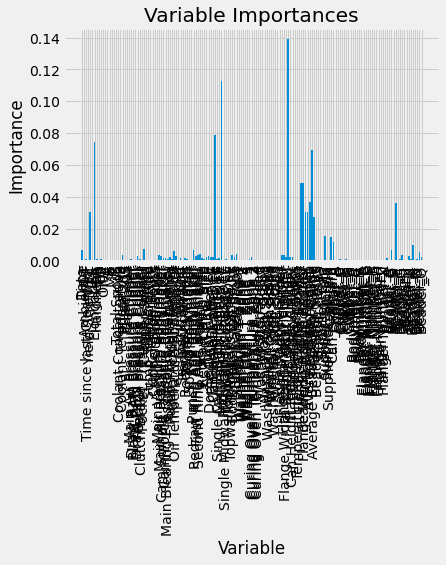

In [41]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


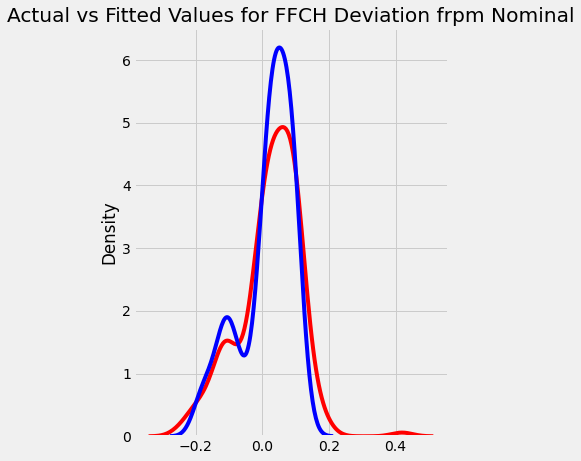

In [52]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(test_predict, hist=False, color="r", label="Actual Value")
sns.distplot(predict_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for FFCH Deviation frpm Nominal')


plt.show()
plt.close()

In [48]:
# Create the dataframe
test_predict2 = pd.DataFrame(test_predict)
test_predict2.head()

,0
0,0.054
1,0.006
2,0.103
3,0.025
4,-0.104


In [50]:
test_predict2.shape


(215, 1)

In [61]:

test_predict2.columns = ['Actual']
test_predict2.head()

,Actual
0,0.054
1,0.006
2,0.103
3,0.025
4,-0.104


In [49]:
# Create the dataframe
predict_pred2 = pd.DataFrame(predict_pred)
predict_pred2.head()

,0
0,0.060312
1,0.028294
2,0.077012
3,0.024351
4,-0.115412


In [51]:
predict_pred2.shape

(215, 1)

In [62]:
predict_pred2.columns = ['Predicted']
predict_pred2.head()

,Predicted
0,0.060312
1,0.028294
2,0.077012
3,0.024351
4,-0.115412


In [67]:
Prediction = test_predict2.join(predict_pred2)

In [68]:
Prediction.head()

,Actual,Predicted
0,0.054,0.060312
1,0.006,0.028294
2,0.103,0.077012
3,0.025,0.024351
4,-0.104,-0.115412


In [76]:
Prediction['z'] = (Prediction['Actual']- Prediction['Predicted'])/(Prediction['Actual'] + 0.001)*100
Prediction.head()

,Actual,Predicted,z
0,0.054,0.060312,-11.477067
1,0.006,0.028294,-318.489331
2,0.103,0.077012,24.988582
3,0.025,0.024351,2.497602
4,-0.104,-0.115412,-11.079428


In [77]:
Prediction.describe()

,Actual,Predicted,z
count,215.000000,215.000000,215.000000
mean,0.021735,0.013872,-inf
std,0.091670,0.079634,NaN
min,-0.247000,-0.194903,-inf
25%,-0.015500,-0.012569,-10.634886
50%,0.036000,0.032430,6.452722
75%,0.090000,0.075218,42.619184
max,0.419000,0.130906,2195.375000
